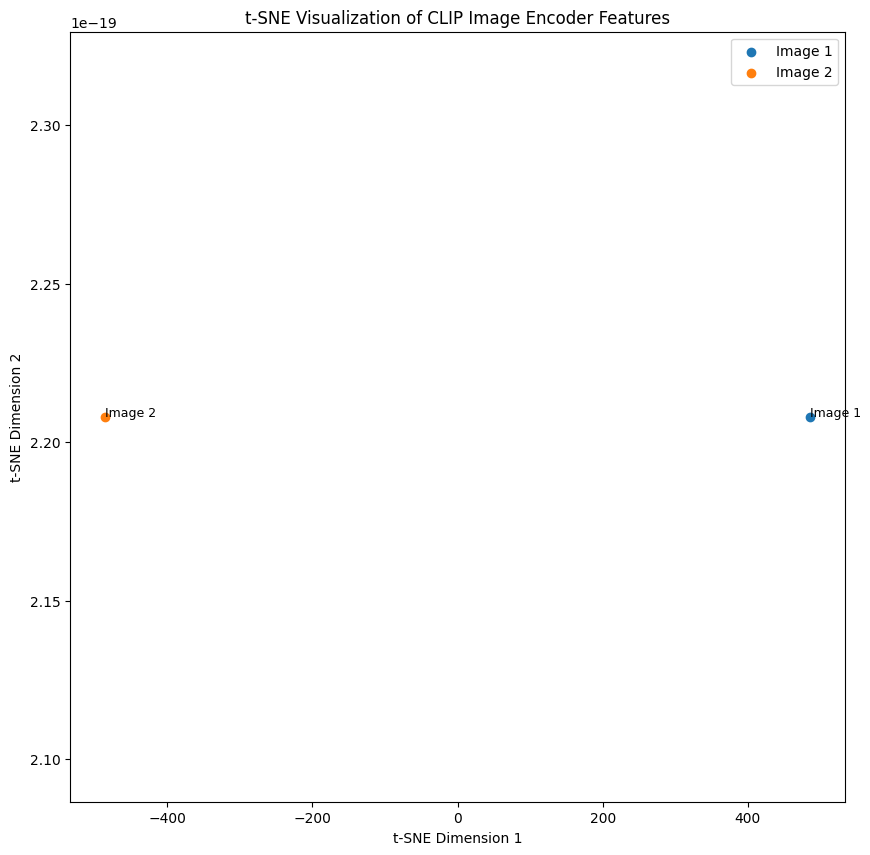

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image
import clip
import torch

# 加载CLIP模型
device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)

# 加载图像并获取编码器输出
# 图像文件夹路径
image_folder = "/home/jingchen/data/coopdata/imagenet/images/train/n07714990/"

# 获取文件夹下所有图片文件名
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

#image_paths = ["/home/jingchen/data/coopdata/imagenet/images/train/n07714990/n07714990_100.JPEG", "/home/jingchen/data/coopdata/imagenet/images/train/n07714990/n07714990_10049.JPEG"]  # 你的图像文件路径
features = []
for image_path in image_paths:
    image = transform(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        feature = model.encode_image(image)
    features.append(feature.cpu().numpy())

# 将特征转换为二维空间
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
embedded_features = tsne.fit_transform(np.array(features).reshape(len(features), -1))

# 可视化结果
plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(embedded_features):
    plt.scatter(x, y, label=f"Image {i+1}")
    plt.text(x, y, f"Image {i+1}", fontsize=9)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of CLIP Image Encoder Features")
plt.legend()
plt.show()


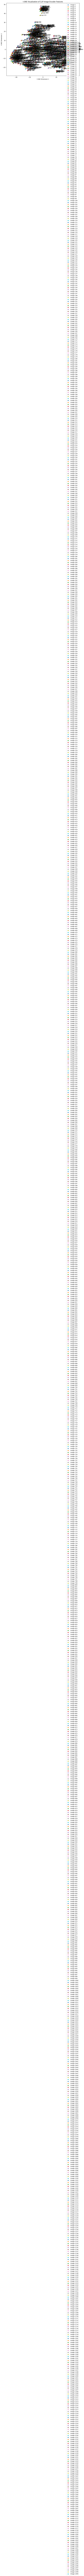

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image
import clip

# 加载CLIP模型
device = "cuda" if torch.cuda.is_available() else "cpu"
model, transform = clip.load("ViT-B/32", device=device)

# 图像文件夹路径
image_folder = "/home/jingchen/data/coopdata/imagenet/images/train/n07714990/"

# 获取文件夹下所有图片文件名
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# 获取编码器输出
features = []
for image_file in image_files:
    image = transform(Image.open(image_file)).unsqueeze(0).to(device)
    with torch.no_grad():
        feature = model.encode_image(image)
    features.append(feature.cpu().numpy())

# 将特征转换为二维空间
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(np.array(features).reshape(len(features), -1))

# 可视化结果
plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(embedded_features):
    plt.scatter(x, y, label=f"Image {i+1}")
    plt.text(x, y, f"Image {i+1}", fontsize=9)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of CLIP Image Encoder Features")
plt.legend()
plt.show()
